In [2]:
from library.optimiser import *
from library.objective_function import *
from library.post_analysis import *
from library.experiments import *
import time
%matplotlib inline
SEED = 23191

In [3]:
def test_high_dimension_same_side(opt, num=1, length=10, hasSTD=False):
    max_dim = np.arange(10, 210, 10).shape[0]
    stats = {}
    dims = np.arange(10, 210, 10)
    times = np.zeros((max_dim, ))
    costs = np.zeros((max_dim, ))
    evals = np.zeros((max_dim, ))

    for i, dim in enumerate(np.arange(10, 210, 10)):
        points_ = np.random.rand(dim, num) * length
        cost = np.zeros((num, ))
        eval_ = np.zeros((num, ))
        start = time.time()
        for j in range(num):
            opt.dim = dim
            if hasSTD:
                opt.std = torch.ones((dim,), dtype=torch.float32) * 3
            opt.x0 = torch.tensor(points_[:,j], dtype=torch.float32, requires_grad=True)
            _ , cost[j], stats = opt.optimise(ackley(dim=dim))
            eval_[j] = stats['evals']
        end = time.time()
        s = end - start
        times[i] = s / num
        costs[i] = cost.mean()
        evals[i] = eval_.mean()
        print("dim: {}, time: {}, cost: {}, evals: {}, time per eval: {} ".format(dim, times[i], costs[i], evals[i], times[i]/evals[i]))
    stats['time'] = times
    stats['evals'] = evals
    stats['cost'] = costs
    stats['dims'] = dims
    return stats

In [4]:
class post_analysis_highD:
    def __init__(self, stats):
        self.stats = stats
    def __plot(self, data, ylabel):
        fig = plt.figure(figsize=(10,6))
        ax = plt.subplot(111)
        ax.plot(self.stats['dims'], data)
        ax.set_xlabel("dimention")
        ax.set_ylabel(ylabel)
        return ax
        
    def plot_time_vs_dim(self):
        return self.__plot(self.stats['time'], "time(s)")
        
    def plot_evals_vs_dim(self):
        return self.__plot(self.stats['evals'], "evals")
        
    def plot_cost_vs_dim(self):
        return self.__plot(self.stats['cost'], "cost")
        

## round off (total local minimizer)

In [4]:
ro = round_off()
stats_ro = test_high_dimension_same_side(ro, 10)
ana_ro = post_analysis_highD(stats_ro)

dim: 10, time: 0.0007931232452392578, cost: 16.168492794036865, evals: 1.0, time per eval: 0.0007931232452392578 
dim: 20, time: 0.00019729137420654297, cost: 15.267230415344239, evals: 1.0, time per eval: 0.00019729137420654297 
dim: 30, time: 0.0001897096633911133, cost: 15.08621129989624, evals: 1.0, time per eval: 0.0001897096633911133 
dim: 40, time: 0.0001459360122680664, cost: 15.371473693847657, evals: 1.0, time per eval: 0.0001459360122680664 
dim: 50, time: 0.00013427734375, cost: 15.219673538208008, evals: 1.0, time per eval: 0.00013427734375 
dim: 60, time: 0.00015270709991455078, cost: 15.41773157119751, evals: 1.0, time per eval: 0.00015270709991455078 
dim: 70, time: 0.00013532638549804688, cost: 15.292867755889892, evals: 1.0, time per eval: 0.00013532638549804688 
dim: 80, time: 0.00014369487762451173, cost: 15.398084545135498, evals: 1.0, time per eval: 0.00014369487762451173 
dim: 90, time: 0.00014247894287109376, cost: 15.35471839904785, evals: 1.0, time per eval: 0

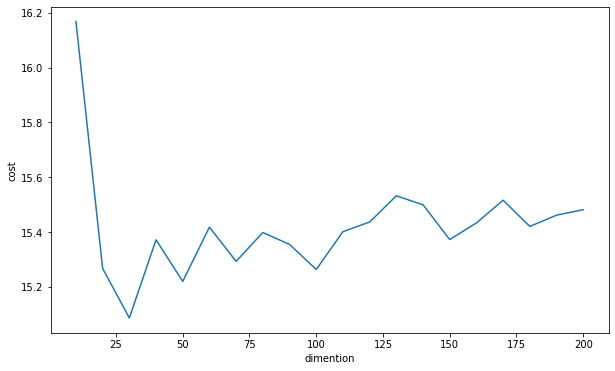

In [5]:
ana_ro.plot_cost_vs_dim()

## keep same distance to origin

## Adam

In [4]:
opt = adam()
optParas = {
         'x0': None,
         'alpha': 0.1,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 2000,
         'tol': 1e-6,              
         'verbose': False,
         'record': False }
opt.set_parameters(optParas)
stats_adam = test_high_dimension_same_side(opt, 1)
ana_adam = post_analysis_highD(stats_adam)

dim: 10, time: 0.14035296440124512, cost: 13.102290153503418, evals: 241.0, time per eval: 0.00058237744564832 
dim: 20, time: 0.13479304313659668, cost: 13.02367115020752, evals: 302.0, time per eval: 0.0004463345799225056 
dim: 30, time: 0.17279911041259766, cost: 12.997076034545898, evals: 272.0, time per eval: 0.0006352908471051385 
dim: 40, time: 1.0176548957824707, cost: 14.505854606628418, evals: 2000.0, time per eval: 0.0005088274478912354 
dim: 50, time: 0.9649698734283447, cost: 13.588522911071777, evals: 2000.0, time per eval: 0.00048248493671417236 
dim: 60, time: 1.0367920398712158, cost: 13.814962387084961, evals: 2000.0, time per eval: 0.0005183960199356079 
dim: 70, time: 0.931002140045166, cost: 13.789435386657715, evals: 2000.0, time per eval: 0.000465501070022583 
dim: 80, time: 1.0240981578826904, cost: 13.192152976989746, evals: 2000.0, time per eval: 0.0005120490789413452 
dim: 90, time: 1.0297350883483887, cost: 13.193381309509277, evals: 2000.0, time per eval: 0

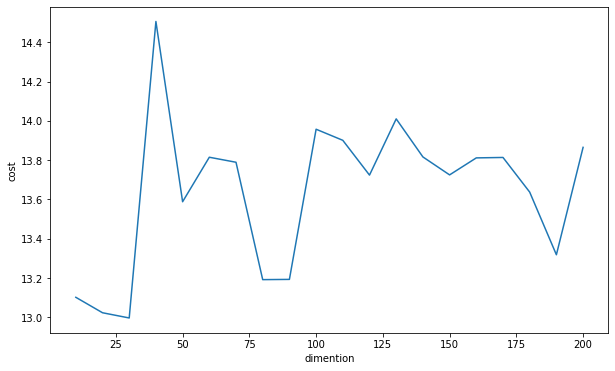

In [5]:
ana_adam.plot_cost_vs_dim()

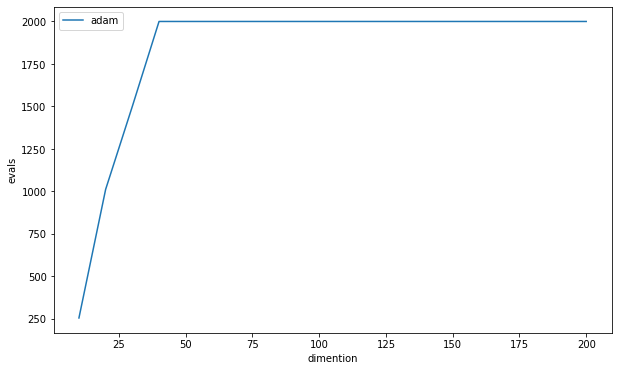

In [8]:
ana_adam.plot_evals_vs_dim()
plt.legend(["adam"])

## line search

In [6]:
paras = {
'x0':1,
'alpha':0.1,
'beta':0.01,
'max_iter':1000,
'tol':1e-1,
'verbose':False,
'record':False
}
ls = line_search()
ls.set_parameters(paras)
stats_ls = test_high_dimension_same_side(ls, 10)
ana_ls = post_analysis_highD(stats_ls)

dim: 10, time: 0.006569385528564453, cost: 13.441605377197266, evals: 18.0, time per eval: 0.0003649658626980252 
dim: 20, time: 0.00877523422241211, cost: 13.26930274963379, evals: 36.4, time per eval: 0.00024107786325307994 
dim: 30, time: 0.013980603218078614, cost: 13.450106525421143, evals: 55.0, time per eval: 0.00025419278578324753 
dim: 40, time: 0.01785898208618164, cost: 13.60316333770752, evals: 67.2, time per eval: 0.0002657586619967506 
dim: 50, time: 0.022215723991394043, cost: 13.58800983428955, evals: 84.4, time per eval: 0.00026321947857101943 
dim: 60, time: 0.029090213775634765, cost: 13.486104583740234, evals: 101.0, time per eval: 0.0002880219185706412 
dim: 70, time: 0.02978940010070801, cost: 13.600808238983154, evals: 112.0, time per eval: 0.0002659767866134644 
dim: 80, time: 0.032499504089355466, cost: 13.638232517242432, evals: 133.4, time per eval: 0.000243624468435948 
dim: 90, time: 0.03844099044799805, cost: 13.804598331451416, evals: 138.8, time per eval

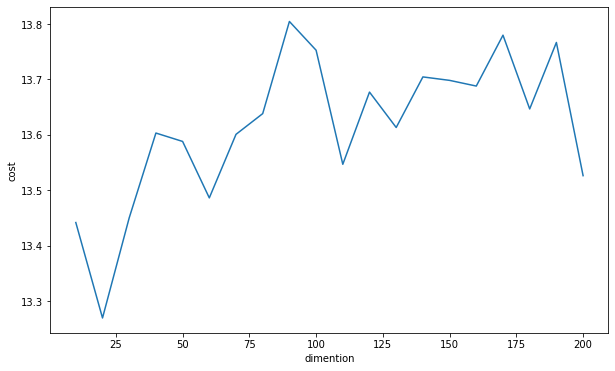

In [7]:
ana_ls.plot_cost_vs_dim()

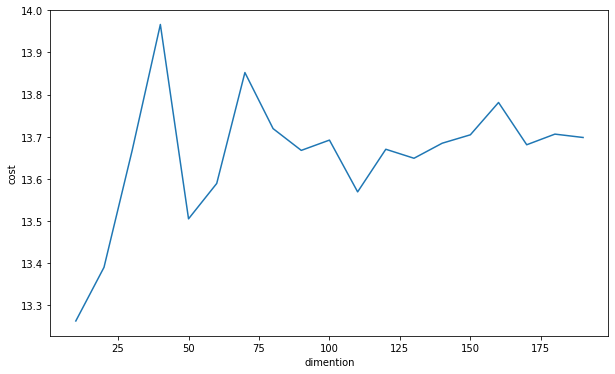

In [29]:
ana_ls.plot_cost_vs_dim()

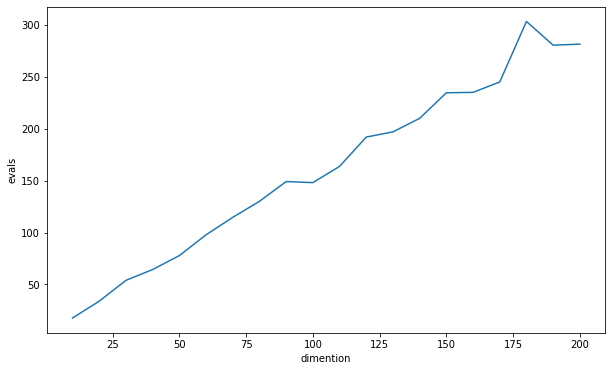

In [11]:
ana_ls.plot_evals_vs_dim()

## cma

In [9]:
# 1 optimiser
opt = cma_es()
optParas ={'x0': torch.zeros((2,)),
           'std': torch.ones((2,)) * 3, 
           'tol': 1e-3, 
           'adjust_func': do_nothing(), 
           'record': False, 
           'verbose': False}
opt.set_parameters(optParas)

stats_cma = test_high_dimension_same_side(opt, 1, hasSTD=True)
ana_cma = post_analysis_highD(stats_cma)

dim: 10, time: 0.9117922782897949, cost: 0.0007562637329101562, evals: 2360.0, time per eval: 0.000386352660292286 
dim: 20, time: 1.8714258670806885, cost: 0.012448310852050781, evals: 4800.0, time per eval: 0.00038988038897514344 
dim: 30, time: 2.3075759410858154, cost: 0.0823984146118164, evals: 5600.0, time per eval: 0.00041206713233675273 
dim: 40, time: 2.3341548442840576, cost: 1.457718849182129, evals: 6000.0, time per eval: 0.0003890258073806763 
dim: 50, time: 2.4767298698425293, cost: 1.2782793045043945, evals: 6000.0, time per eval: 0.00041278831164042156 
dim: 60, time: 2.7507131099700928, cost: 4.970078468322754, evals: 6400.0, time per eval: 0.000429798923432827 
dim: 70, time: 3.031026840209961, cost: 3.871464729309082, evals: 6400.0, time per eval: 0.0004735979437828064 
dim: 80, time: 3.8374388217926025, cost: 4.428170204162598, evals: 6800.0, time per eval: 0.0005643292384989122 
dim: 90, time: 4.230678081512451, cost: 4.846451759338379, evals: 6800.0, time per eval

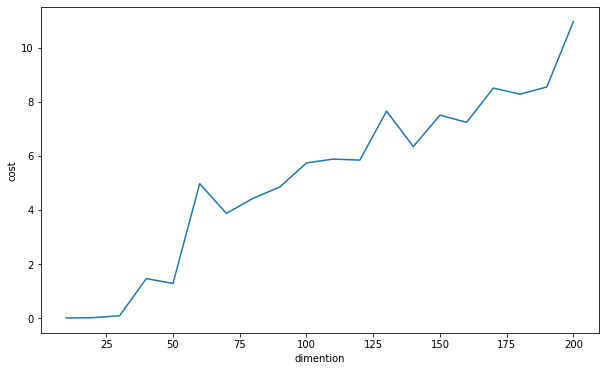

In [10]:
ana_cma.plot_cost_vs_dim()

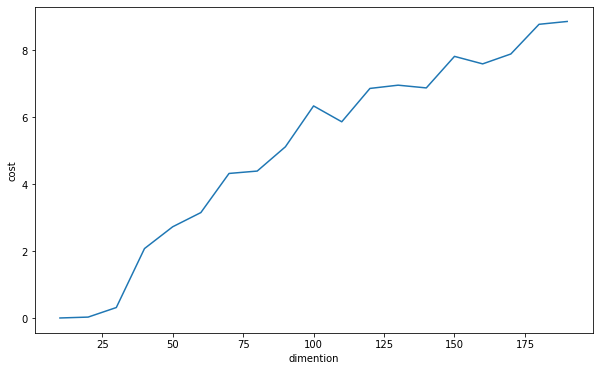

In [35]:
ana_cma.plot_cost_vs_dim()

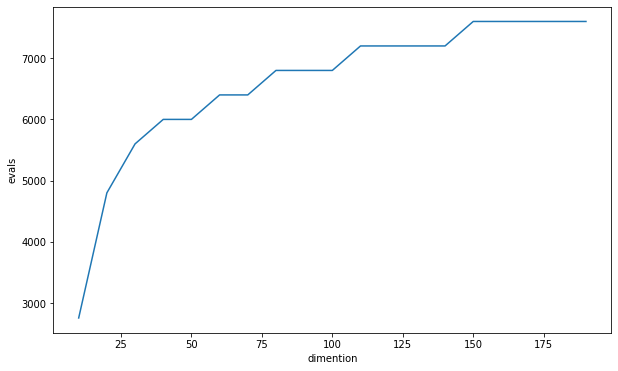

In [36]:
ana_cma.plot_evals_vs_dim()

In [88]:
# 1 optimiser
opt = cma_es()
optParas ={'x0': np.zeros((2,)),
           'std': np.ones((2,)) * 3, 
           'tol': 1e-1, 
           'adjust_func': do_nothing(), 
           'max_iter': 1000,
           'record': False, 
           'verbose': False}
opt.set_parameters(optParas)

stats_cma = test_high_dimension_same_side(opt, 1, hasSTD=True)
ana_cma = post_analysis_highD(stats_cma)

dim: 10, time: 0.10495805740356445, cost: 0.06335681640821678, evals: 1150.0, time per eval: 9.126787600309952e-05 


/Users/huajian/Non-convex/library/optimiser.py:150: ComplexWarning:

Casting complex values to real discards the imaginary part



dim: 20, time: 0.31101417541503906, cost: 0.06267447413323923, evals: 3624.0, time per eval: 8.58206885803088e-05 
dim: 30, time: 0.7343759536743164, cost: 0.050277420353808555, evals: 7056.0, time per eval: 0.00010407822472708566 
dim: 40, time: 1.4055569171905518, cost: 0.04731332481231165, evals: 12105.0, time per eval: 0.00011611374780591092 
dim: 50, time: 1.8164448738098145, cost: 0.046865954775978214, evals: 12630.0, time per eval: 0.00014381986332619276 
dim: 60, time: 2.658221960067749, cost: 0.13445204145916323, evals: 16000.0, time per eval: 0.0001661388725042343 
dim: 70, time: 3.512701988220215, cost: 0.31863234710904864, evals: 16000.0, time per eval: 0.00021954387426376343 
dim: 80, time: 4.561464071273804, cost: 2.8620906275737146, evals: 17000.0, time per eval: 0.0002683214159572826 
dim: 90, time: 5.709452152252197, cost: 2.1384658328604407, evals: 17000.0, time per eval: 0.0003358501266030704 
dim: 100, time: 6.8715736865997314, cost: 3.138737698255554, evals: 17000.

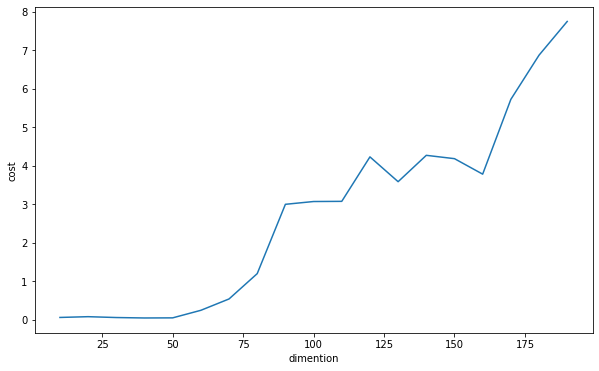

In [39]:
ana_cma.plot_cost_vs_dim()

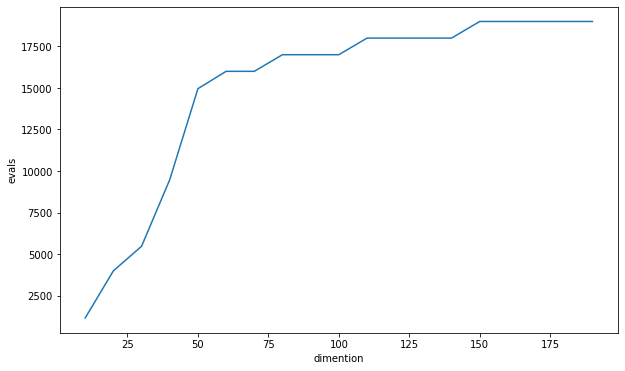

In [40]:
ana_cma.plot_evals_vs_dim()

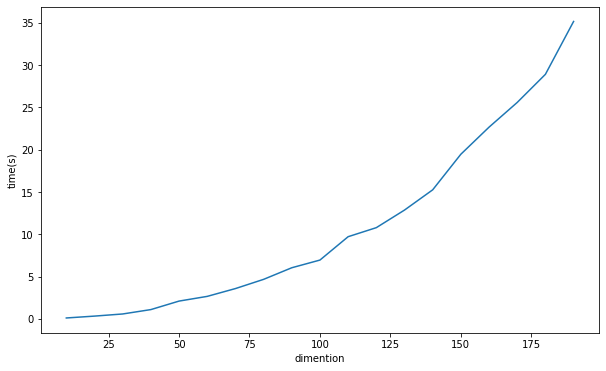

In [41]:
ana_cma.plot_time_vs_dim()

In [30]:
ana_ad = post_analysis_highD(stats_ad)

In [20]:
cma = cma_es()
stats_ad = test_high_dimension_cma(cma)

dim: 1, time: 0.03937792778015137, cost: 1.7296792624854618e-06, evals: 196.0
dim: 11, time: 0.31318020820617676, cost: 2.5791379965500738e-05, evals: 3839.0
dim: 21, time: 0.4485137462615967, cost: 0.0082663504355307, evals: 5200.0
dim: 31, time: 0.5610907077789307, cost: 0.29450176065664424, evals: 5600.0
dim: 41, time: 0.7663192749023438, cost: 2.027314080072085, evals: 6000.0
dim: 51, time: 0.9734439849853516, cost: 3.3053796735329866, evals: 6000.0
dim: 61, time: 1.1368680000305176, cost: 3.1667732428782007, evals: 6400.0
dim: 71, time: 1.464972972869873, cost: 4.5921453186339924, evals: 6400.0
dim: 81, time: 1.8459439277648926, cost: 5.3468395541218285, evals: 6800.0
dim: 91, time: 2.3009791374206543, cost: 6.344076803924189, evals: 6800.0
dim: 101, time: 2.8644068241119385, cost: 7.86297355947519, evals: 6800.0
dim: 111, time: 3.568682909011841, cost: 4.675826227566155, evals: 7200.0
dim: 121, time: 4.2510621547698975, cost: 8.016529886268792, evals: 7200.0
dim: 131, time: 5.622

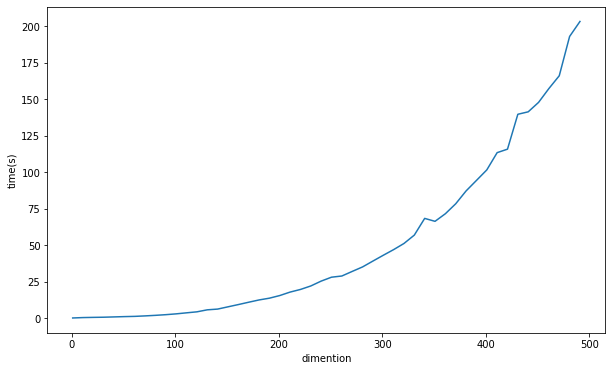

In [23]:
ana_ad.plot_time_vs_dim()

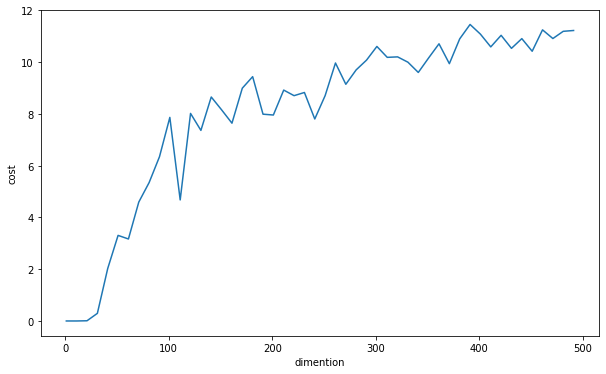

In [24]:
ana_ad.plot_cost_vs_dim()

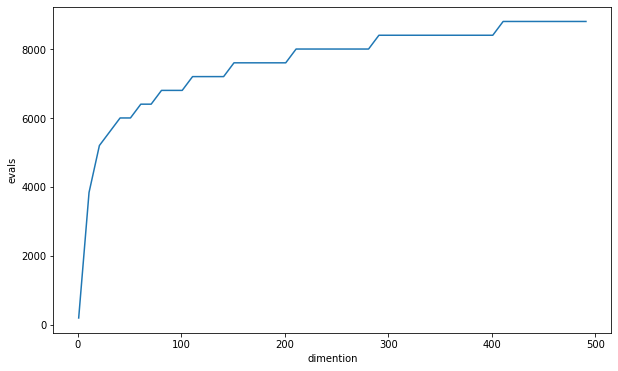

In [25]:
ana_ad.plot_evals_vs_dim()

In [5]:
# 1 optimiser
inner_opt = line_search()
innerOptParas = {
    'x0': None,
    'alpha': 1,
    'beta': 0.1, 
    'max_iter': 10,
    'tol': 1e-1,              
    'verbose': False,
    'record': False
}
inner_opt.set_parameters(innerOptParas)

opt = cma_es()
optParas ={'x0': None,
           'std': torch.ones((2,)) * 30, 
           'tol': 1e-1, 
           'adjust_func': inner_opt, 
           'max_iter': 100,
           'record': False, 
           'verbose': False}
opt.set_parameters(optParas)

stats_cmals = test_high_dimension_same_side(opt, 1, hasSTD=True)
ana_cmals = post_analysis_highD(stats_cmals)

dim: 10, time: 1.5544471740722656, cost: 9.5367431640625e-07, evals: 6356.0, time per eval: 0.0002445637467074049 
dim: 20, time: 3.1327028274536133, cost: 9.5367431640625e-07, evals: 12896.0, time per eval: 0.00024292050461023677 
dim: 30, time: 7.970523834228516, cost: 2.739415168762207, evals: 31900.0, time per eval: 0.0002498596813237779 
dim: 40, time: 6.502166986465454, cost: 3.9221277236938477, evals: 23942.0, time per eval: 0.0002715799426307516 


KeyboardInterrupt: 

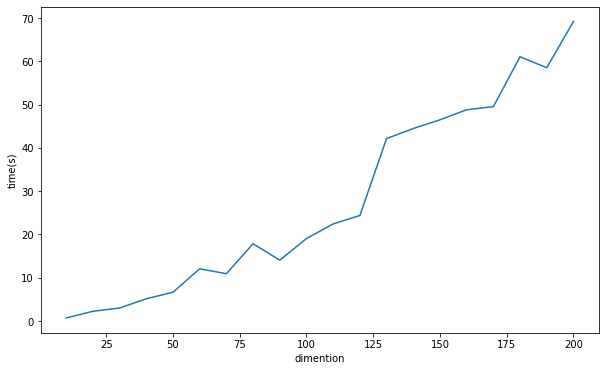

In [17]:
ana_cmals.plot_time_vs_dim()

## cma-es with line search

In [98]:
# 1 optimiser
inner_opt = line_search()
innerOptParas = {
    'x0': None,
    'alpha': 1,
    'beta': 0.1, 
    'max_iter': 10,
    'tol': 1e-1,              
    'verbose': False,
    'record': False
}
inner_opt.set_parameters(innerOptParas)

opt = cma_es()
optParas ={'x0': np.zeros((2,)),
           'std': np.ones((2,)) * 30, 
           'tol': 1e-1, 
           'adjust_func': inner_opt, 
           'max_iter': 1000,
           'record': False, 
           'verbose': False}
opt.set_parameters(optParas)

stats_cmals = test_high_dimension_same_side(opt, 1, hasSTD=True)
ana_cmals = post_analysis_highD(stats_cmals)

dim: 10, time: 0.22884297370910645, cost: 4.347218894640292e-06, evals: 5618.0, time per eval: 4.073388638467541e-05 
dim: 20, time: 0.5019280910491943, cost: 6.389832041708843e-06, evals: 12618.0, time per eval: 3.977873601594503e-05 
dim: 30, time: 1.2287707328796387, cost: 2.1453971701834718e-05, evals: 28862.0, time per eval: 4.257399809020992e-05 
dim: 40, time: 1.6126279830932617, cost: 5.150045570889716e-06, evals: 38487.0, time per eval: 4.190058937026169e-05 
dim: 50, time: 1.8355779647827148, cost: 2.526192237173319e-06, evals: 41669.0, time per eval: 4.405140427614569e-05 
dim: 60, time: 3.7515017986297607, cost: 8.991795086288334e-08, evals: 80540.0, time per eval: 4.6579361790784217e-05 
dim: 70, time: 3.285691022872925, cost: 9.248864995203832e-06, evals: 64416.0, time per eval: 5.100737429944307e-05 
dim: 80, time: 6.638718843460083, cost: 5.056398528768824e-06, evals: 118790.0, time per eval: 5.5886175969863484e-05 
dim: 90, time: 6.5466930866241455, cost: 1.14356033664

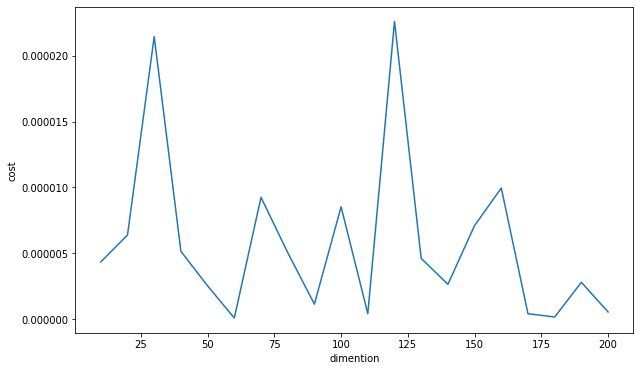

In [99]:
ana_cmals.plot_cost_vs_dim()

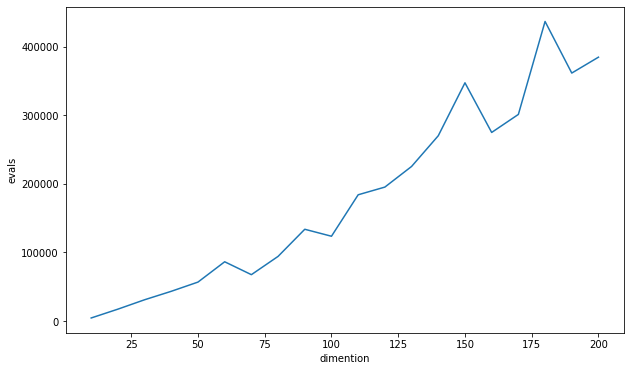

In [93]:
ana_cmals.plot_evals_vs_dim()

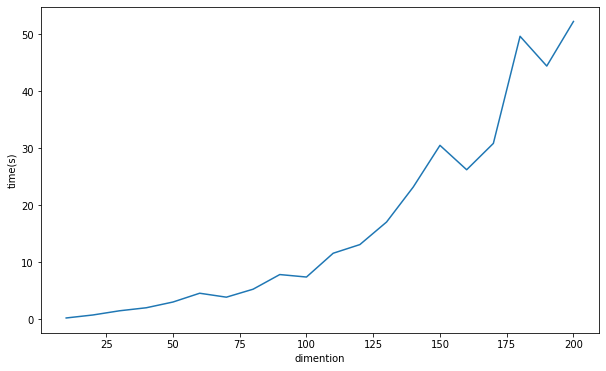

In [94]:
ana_cmals.plot_time_vs_dim()

In [ ]:
# 1 optimiser
inner_opt = adam()
optParas = {
         'x0': None,
         'alpha': 1,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 10,
         'tol': 1e-1,              
         'verbose': False,
         'record': False }
inner_opt.set_parameters(optParas)

opt = cma_es()
optParas ={'x0': None,
           'std': torch.ones((2,)) * 3, 
           'tol': 1e-1, 
           'adjust_func': inner_opt, 
           'max_iter': 1000,
           'record': False, 
           'verbose': False}
opt.set_parameters(optParas)

stats_cmadm = test_high_dimension_same_side(opt, 1, hasSTD=True)
ana_cmadm = post_analysis_highD(stats_cmadm)

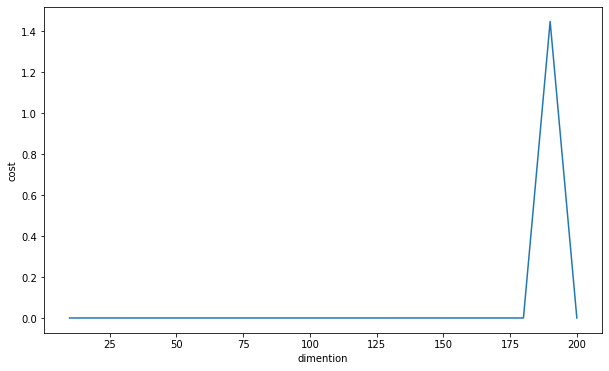

In [21]:
ana_cmadm.plot_cost_vs_dim()

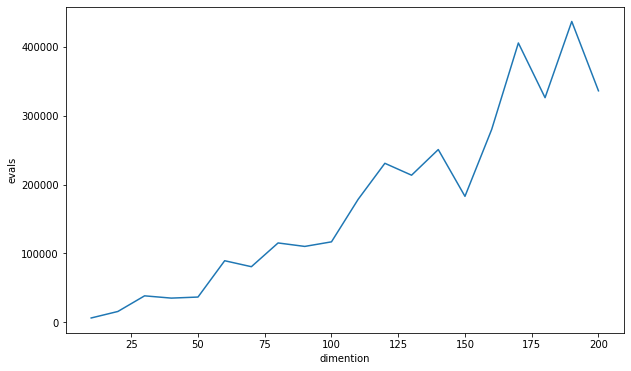

In [22]:
ana_cmadm.plot_evals_vs_dim()

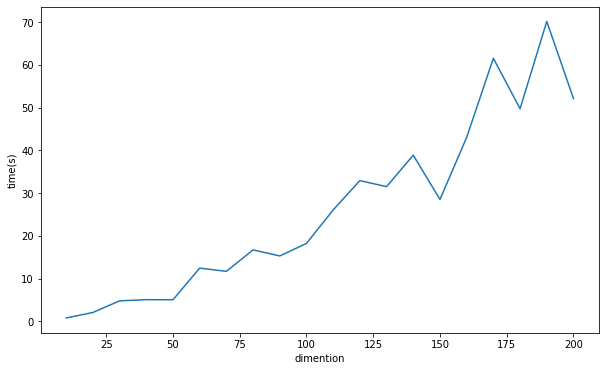

In [23]:
ana_cmadm.plot_time_vs_dim()

In [ ]:
# 1 optimiser
opt = adam()
optParas = {
         'x0': None,
         'alpha': 1,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 10,
         'tol': 1e-1,              
         'verbose': False,
         'record': False }
opt.set_parameters(optParas)

opt = cma_es()
optParas ={'x0': None,
           'std': torch.ones((2,)) * 3, 
           'tol': 1e-1, 
           'adjust_func': inner_opt, 
           'max_iter': 1000,
           'record': False, 
           'verbose': False}
opt.set_parameters(optParas)

stats_cmadm = test_high_dimension_same_side(opt, 1, hasSTD=True)
ana_cmadm = post_analysis_highD(stats_cmadm)

In [103]:
# 1 optimiser
opt = adam()
optParas = {
         'x0': None,
         'alpha': 1,
         'beta_1': 0.9, 
         'beta_2': 0.999, 
         'epsilon': 1e-11, 
         'max_iter': 10,
         'tol': 1e-1,              
         'verbose': False,
         'record': False }
opt.set_parameters(optParas)

opt = cma_es()
optParas ={'x0': np.zeros((2,)),
           'std': np.ones((2,)) * 3, 
           'tol': 1e-1, 
           'adjust_func': inner_opt, 
           'max_iter': 1000,
           'record': False, 
           'verbose': False}
opt.set_parameters(optParas)

stats_cmadm = test_high_dimension_same_side(opt, 1, hasSTD=True)
ana_cmadm = post_analysis_highD(stats_cmadm)

dim: 10, time: 0.20572304725646973, cost: 2.0209183170027956e-05, evals: 4922.0, time per eval: 4.179663698831161e-05 
dim: 20, time: 0.5532059669494629, cost: 6.837983090868249e-07, evals: 13592.0, time per eval: 4.0700851011584966e-05 
dim: 30, time: 1.9285502433776855, cost: 1.1873002887075046e-05, evals: 40581.0, time per eval: 4.752347757269869e-05 
dim: 40, time: 2.0519752502441406, cost: 1.3408101229295255e-06, evals: 41170.0, time per eval: 4.984151688715425e-05 
dim: 50, time: 2.8868770599365234, cost: 7.814904627867492e-06, evals: 53901.0, time per eval: 5.3558877570667025e-05 
dim: 60, time: 3.134589195251465, cost: 3.715936220949345e-07, evals: 65435.0, time per eval: 4.7903861775066325e-05 
dim: 70, time: 5.029847860336304, cost: 1.9337309109523915e-06, evals: 85962.0, time per eval: 5.851245736879439e-05 
dim: 80, time: 6.320393323898315, cost: 1.93970190709436e-06, evals: 92163.0, time per eval: 6.85784243557427e-05 
dim: 90, time: 5.521755695343018, cost: 3.421040422058

In [19]:
stats_cmadam = stats_cmadm.stats

AttributeError: 'dict' object has no attribute 'stats'

In [ ]:
stats_cmadm = post_analysis_highD(stats_cmadm)

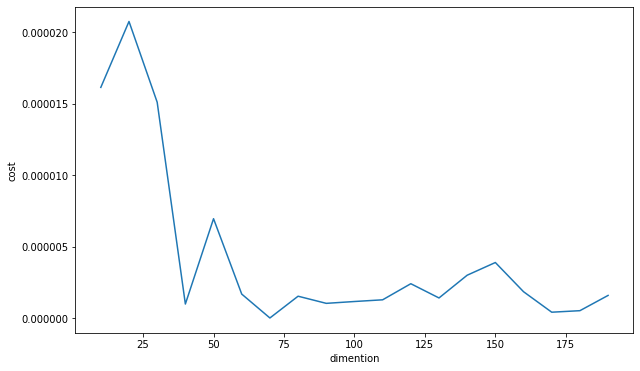

In [66]:
stats_cmadm.plot_cost_vs_dim()

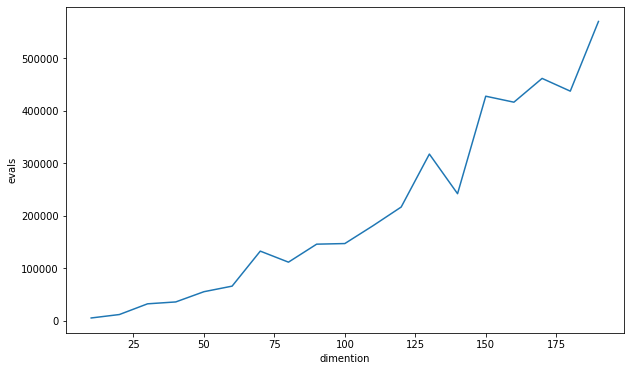

In [67]:
stats_cmadm.plot_evals_vs_dim()

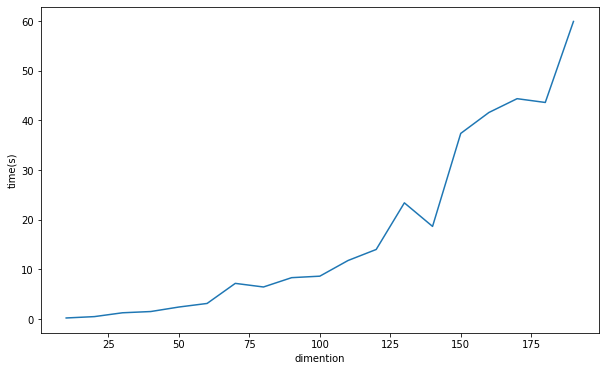

In [69]:
stats_cmadm.plot_time_vs_dim()

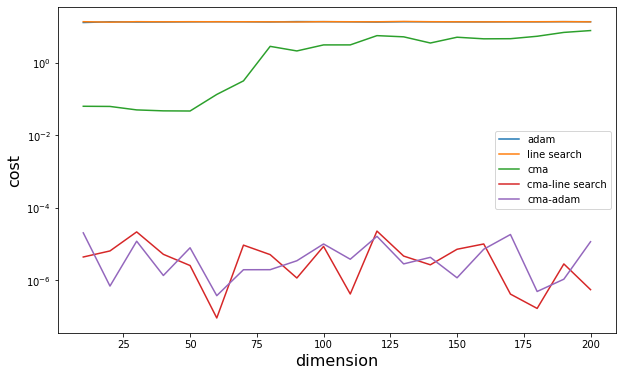

In [117]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(stats_adam['dims'], stats_adam['cost'], label="adam")
ax.plot(stats_ls['dims'], stats_ls["cost"], label="line search")
ax.plot(stats_cma['dims'], stats_cma['cost'], label="cma")
ax.plot(stats_cmals['dims'], stats_cmals['cost'], label="cma-line search")
ax.plot(stats_cmadam['dims'], stats_cmadam['cost'], label="cma-adam")
ax.set_xlabel("dimension", fontsize=16)
ax.set_ylabel("cost", fontsize=16)
plt.yscale('log')
plt.legend()

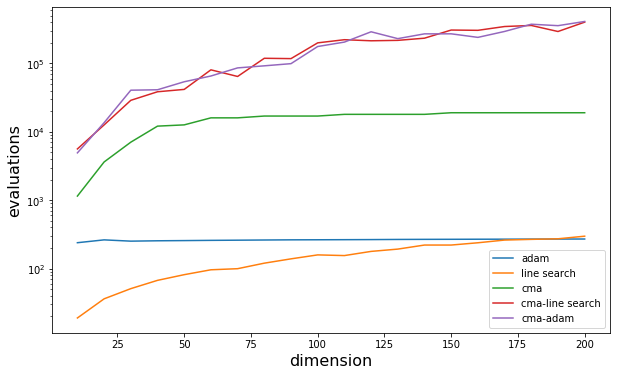

In [116]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(stats_adam['dims'], stats_adam['evals'], label="adam")
ax.plot(stats_ls['dims'], stats_ls["evals"], label="line search")
ax.plot(stats_cma['dims'], stats_cma['evals'], label="cma")
ax.plot(stats_cmals['dims'], stats_cmals['evals'], label="cma-line search")
ax.plot(stats_cmadam['dims'], stats_cmadam['evals'], label="cma-adam")
ax.set_xlabel("dimension", fontsize=16)
ax.set_ylabel("evaluations", fontsize=16)
plt.yscale('log')
plt.legend()

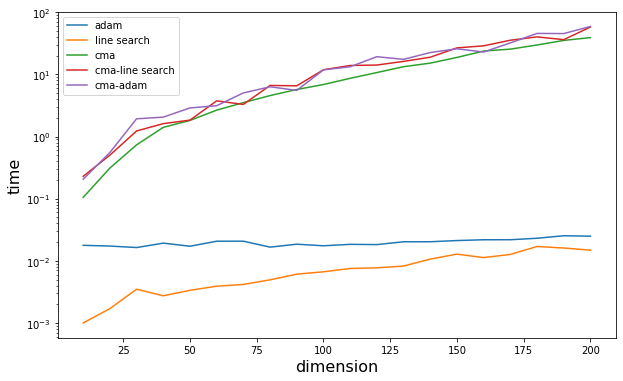

In [115]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(stats_adam['dims'], stats_adam['time'], label="adam")
ax.plot(stats_ls['dims'], stats_ls["time"], label="line search")
ax.plot(stats_cma['dims'], stats_cma['time'], label="cma")
ax.plot(stats_cmals['dims'], stats_cmals['time'], label="cma-line search")
ax.plot(stats_cmadam['dims'], stats_cmadam['time'], label="cma-adam")
ax.set_xlabel("dimension", fontsize=16)
ax.set_ylabel("time", fontsize=16)
plt.yscale('log')
plt.legend()

In [72]:
stats_adam

{'status': None,
 'gradient_before_after': array([], dtype=float64),
 'arg': array([], dtype=float64),
 'val': array([], dtype=float64),
 'evals': array([237.2, 247.3, 251.3, 254.3, 257.2, 259.2, 260.7, 261.9, 263.2,
        263.9, 265.5, 265.7, 266.7, 267.6, 268.5, 269. , 269.3, 270.6,
        270.9]),
 'time': array([0.01557949, 0.0163682 , 0.01668029, 0.01597569, 0.01781449,
        0.01756742, 0.0181963 , 0.0198756 , 0.0186336 , 0.0189527 ,
        0.01802061, 0.01828983, 0.02055011, 0.02064071, 0.02168419,
        0.02098141, 0.01999197, 0.02145431, 0.02124171]),
 'cost': array([13.82151054, 13.34264805, 13.70775604, 13.3717643 , 13.44953106,
        13.53019301, 13.61418572, 13.85600214, 13.69664801, 13.66005804,
        13.62869559, 13.5946261 , 13.53572088, 13.56247041, 13.77006438,
        13.62253496, 13.60720662, 13.772358  , 13.64073992]),
 'dims': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140, 150, 160, 170, 180, 190])}